# Ice-age dynamics: Earth Orbit
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

## Calder ice-volume model

Ice volume directly coupled to insolation:
$$
\frac{\displaystyle dV}{\displaystyle dt} = -k \left( I - I_0 \right)
$$
with $I$ insolation, $I_0$ insolation threshold (ice volume increases, once
insolution is lower than threshold), $V$ ice volume, $t$ time,
and $k$ a proportonality parameter, depending on *ablation* or
*accumulation*:
    
- $k=k_M$ für $I>I_0$, melting
- $k=k_A$ für $I<I_0$, accumulation

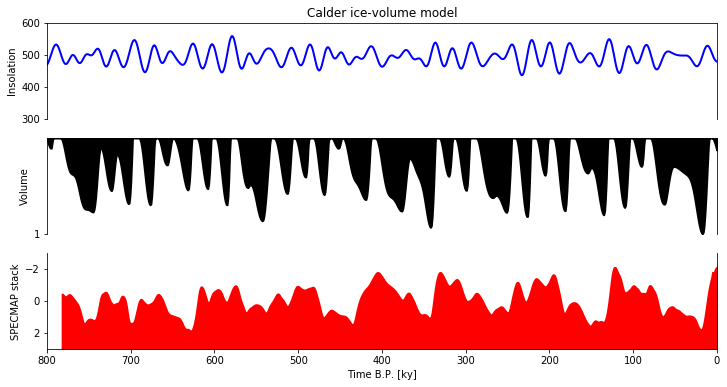

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed, HBox, VBox
import ipywidgets as widgets

#-----------------------------------------------------------------------
# read data into field
#-----------------------------------------------------------------------
infile1='data/insolation.x'
year=np.loadtxt(fname=infile1,skiprows=1,usecols=0);year=-year
insol=np.loadtxt(fname=infile1,skiprows=1,usecols=1)
n = insol.shape[0]

infile1='data/specmap.x'
year2=np.loadtxt(fname=infile1,skiprows=1,usecols=0);year2=-year2
specmap=np.loadtxt(fname=infile1,skiprows=1,usecols=1)

tmax = 800.
tmin = 0.

#-----------------------------------------------------------------------
# define function to plot interactively
#-----------------------------------------------------------------------
def plot_calder(I0,km,ka):
    # calculate model

    dtime  = 1000.
    volume = np.zeros(n)
    for i in range(1,n):
        k = ka
        if (insol[i] > I0):
            k = km
        volume[i] = volume[i-1] - k*(insol[i]-I0)*dtime
        if (volume[i] < 0):
            volume[i] = 0
        
    # plot time series
    plt.figure(figsize=(12.0, 6.0))
    plot1=plt.subplot2grid((3,2), (0,0), colspan=2,rowspan=1)
    plot2=plt.subplot2grid((3,2), (1,0), colspan=2,rowspan=1)
    plot3=plt.subplot2grid((3,2), (2,0), colspan=2,rowspan=1)
    plot1.set_xlabel('')
    plot1.set_ylabel('Insolation')
    plot1.set_title('Calder ice-volume model')
    plot1.plot(year/1000,insol,color='blue',linestyle='-',linewidth=2,label='Insolation')
    plot1.set_xlim([tmax,tmin])
    plot1.set_ylim([300,600])
    plot1.axes.get_xaxis().set_visible(False)
    plot1.spines['bottom'].set_visible(False)
    #plot1.legend(loc='upper right')
    
    plot2.set_xlabel('Time B.P. [ky]')
    plot2.set_ylabel('Volume')
    plot2.fill_between(year/1000,0,volume/volume.max(),color='black',linestyle='-',linewidth=2,label='Specmap')
    plot2.set_xlim([tmax,tmin])
    plot2.set_ylim([1.0,0])
    plot2.set_yticks([1])
    plot2.axes.get_xaxis().set_visible(False)
    plot2.spines['top'].set_visible(False)
    plot2.spines['bottom'].set_visible(False)
    #plot2.legend(loc='upper right')
    
    plot3.set_xlabel('Time B.P. [ky]')
    plot3.set_ylabel('SPECMAP stack')
    plot3.fill_between(year2/1000,specmap,3,color='red',linestyle='-',linewidth=2,label='Specmap')
    plot3.set_xlim([tmax,tmin])
    plot3.set_ylim([3,-3])
    plot3.spines['top'].set_visible(False)
    #plot3.legend(loc='upper right')

km     = 0.001
ka     = 0.0002 #0.2*km
I0     = 502.
#plot_calder(I0,km,ka)
    
# call interactive module
interactive_plot = interactive(plot_calder,
                               km=widgets.FloatSlider(min=0.001,max=0.005,step=0.001,value=0.001),
                               ka=widgets.FloatSlider(min=0.0002,max=0.0005,step=0.0001,value=0.0002),
                               I0=widgets.IntSlider(min=460,max=515,step=2,value=502))
output = interactive_plot.children[-1]
interactive_plot

## Imbrie & Imbrie ice-volume model

Ice volume increases with delay:
$$
\frac{\displaystyle dV}{\displaystyle dt} = \frac{\displaystyle I-V}{\displaystyle \tau}
$$
with $I$ insolation, $V$ ice volume, $t$ time,
and $\tau$ a retardation time, depending on *ablation* or
*accumulation*:
    
- $\tau=\tau_M$ für $V>I$, melting
- $\tau=\tau_A$ für $V<I$, accumulation

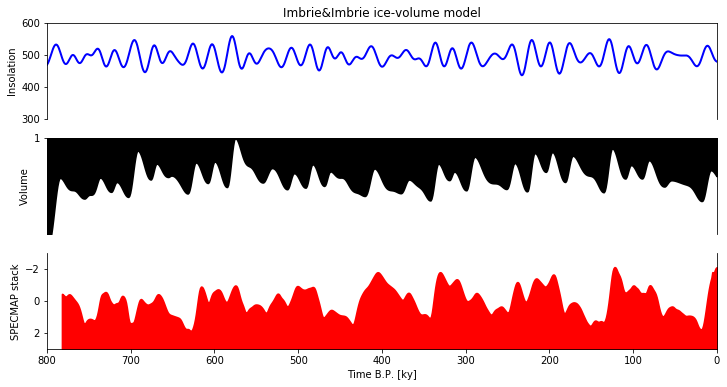

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed, HBox, VBox
import ipywidgets as widgets

#-----------------------------------------------------------------------
# read data into field
#-----------------------------------------------------------------------
infile1='data/insolation.x'
year=np.loadtxt(fname=infile1,skiprows=1,usecols=0);year=-year
insol=np.loadtxt(fname=infile1,skiprows=1,usecols=1)
n = insol.shape[0]
print(insol[0])

infile1='data/specmap.x'
year2=np.loadtxt(fname=infile1,skiprows=1,usecols=0);year2=-year2
specmap=np.loadtxt(fname=infile1,skiprows=1,usecols=1)

tmax = 800.
tmin = 0.

#-----------------------------------------------------------------------
# define function to plot interactively
#-----------------------------------------------------------------------
def plot_imbrie(taum,taua):
    # calculate model
    dtime  = 1000.
    volume = np.zeros(n)
    volume[0] = insol[0]
    for i in range(1,n):
        tau = taua
        if (volume[i-1] > insol[i]):
            tau = taum
        volume[i] = volume[i-1] + (insol[i]-volume[i-1])/tau*dtime
        if (volume[i] < 0):
            volume[i] = 0
        
    # plot time series
    plt.figure(figsize=(12.0, 6.0))
    plot1=plt.subplot2grid((3,2), (0,0), colspan=2,rowspan=1)
    plot2=plt.subplot2grid((3,2), (1,0), colspan=2,rowspan=1)
    plot3=plt.subplot2grid((3,2), (2,0), colspan=2,rowspan=1)
    plot1.set_xlabel('')
    plot1.set_ylabel('Insolation')
    plot1.set_title('Imbrie&Imbrie ice-volume model')
    plot1.plot(year/1000,insol,color='blue',linestyle='-',linewidth=2,label='Insolation')
    plot1.set_xlim([tmax,tmin])
    plot1.set_ylim([300,600])
    plot1.axes.get_xaxis().set_visible(False)
    plot1.spines['bottom'].set_visible(False)
    #plot1.legend(loc='upper right')
    
    plot2.set_xlabel('Time B.P. [ky]')
    plot2.set_ylabel('Volume')
    plot2.fill_between(year/1000,volume/volume.max(),1.0,color='black',linestyle='-',linewidth=2,label='Specmap')
    plot2.set_xlim([tmax,tmin])
    plot2.set_ylim([0.9,1.0])
    plot2.set_yticks([1])
    plot2.axes.get_xaxis().set_visible(False)
    plot2.spines['top'].set_visible(False)
    plot2.spines['bottom'].set_visible(False)
    #plot2.legend(loc='upper right')
    
    plot3.set_xlabel('Time B.P. [ky]')
    plot3.set_ylabel('SPECMAP stack')
    plot3.fill_between(year2/1000,specmap,3,color='red',linestyle='-',linewidth=2,label='Specmap')
    plot3.set_xlim([tmax,tmin])
    plot3.set_ylim([3,-3])
    plot3.spines['top'].set_visible(False)
    #plot3.legend(loc='upper right')
    
# call interactive module
interactive_plot = interactive(plot_imbrie,
                               taum=widgets.IntSlider(min=10000,max=50000,step=1000,value=42000),
                               taua=widgets.IntSlider(min=10000,max=50000,step=1000,value=10000))
output = interactive_plot.children[-1]
interactive_plot